# Exploration Data Analysis

The EDA is mainly focused in two sections, being the first one the most relevant. 

Section 1 displays some of the key findings of the data input. It imports the tailored TextAnalytics class, developed for this exercise which performs the following operations:


- **Quick token frequency analysis**: This is a quick analysis of the most relevant terms per each of the labels provided. 
- **Quick and simple sentiment analysis:** The pipeline is built aiming for scalability, so it's prepared to receive any type of sentiment modeller (if the outputs are formatted as expected), but a simple NTLK VADER SentimentAnalysis has been chosen for this example as a default. 
- **Ease of Read Analytics**: Some ease of read analytics based on the `textstat` library have been developed. This allows to extract metrics regarding how conscice and easy-to-follow a text is. This variable shows to be related with the Acceptance rate.
- **Linear Discriminant Analysis**: Taking advantage of the embeddings provided. A simple linear classifier anlaysis is performed using DABL. This allows us to explore the predictive power of the use case, as well as some of the most relevant interactions between the variables. This being the most relevant part to our modelling objectives. 

Section 2 simply validates that the Topics provided have a good-enough quality, using simple visual checks. Given I have not participated in the creation of the embeddings, no performance metrics have been provided, as I work under the assumption that these embeddings are validated. 

In [1]:
# imports
import sys

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk

from stream_ml.utils import read_data_input
from stream_ml.text_analytics import TextAnalytics


/var/folders/gm/82lk2qqj3737203ydr7y53r80000gq/T/ipykernel_19946/943915768.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Section 1 - Text Analytics

In [2]:
# load the data
DIR = "../data/queries"
df = read_data_input(DIR)

DUPLICATES ANALYSIS -----------------------
There are 21 duplicate values in the DF
Most Common text duplicates and their count
----------------------------------------


text
Lack of Ukrainian grain shipments risks compounding global food crisis                                                                                                                                                               3
CHICAGO, May 24, 2022 /PRNewswire/ -- In the midst of a national baby formula shortage, many American families are struggling to feed their infants.                                                                                 2
TOKYO (Reuters) - Bank of Japan Governor Haruhiko Kuroda pledged on Monday to patiently stick to powerful monetary easing to help the economy recover from the COVID-19-induced doldrums.                                            2
Global Display Device Market Report (2022 to 2027) - Players Include LG Electronics, Sharp and Toshiba - ResearchAndMarkets.com    

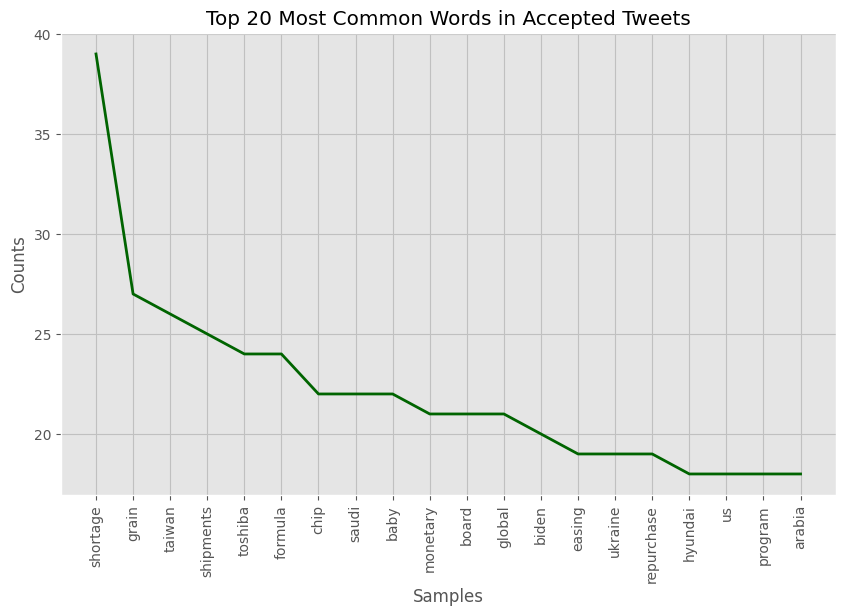

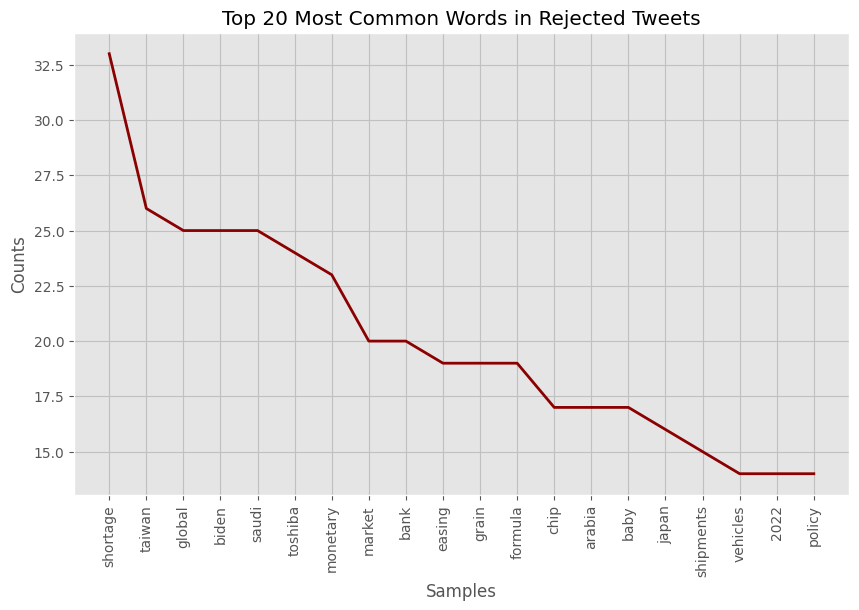

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kdlx593/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a lengt

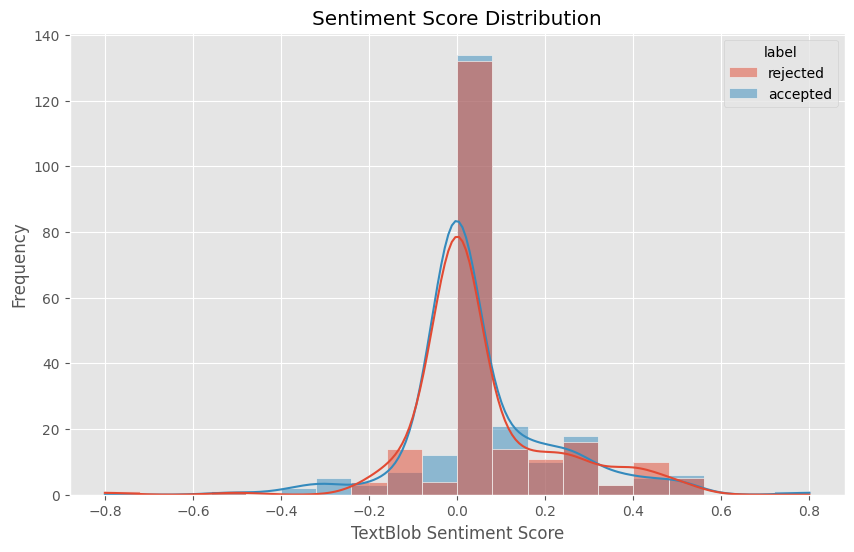

/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

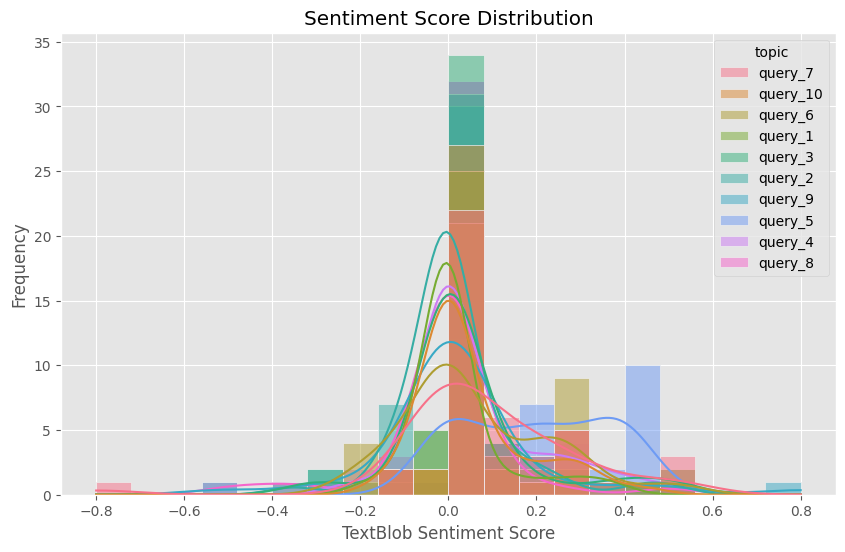

Reading Ease and Time Analysis


/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

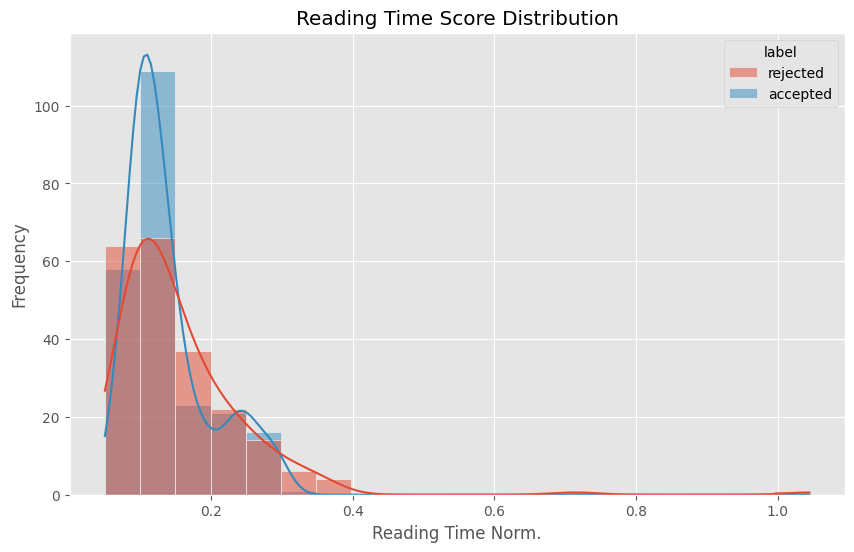

/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warni

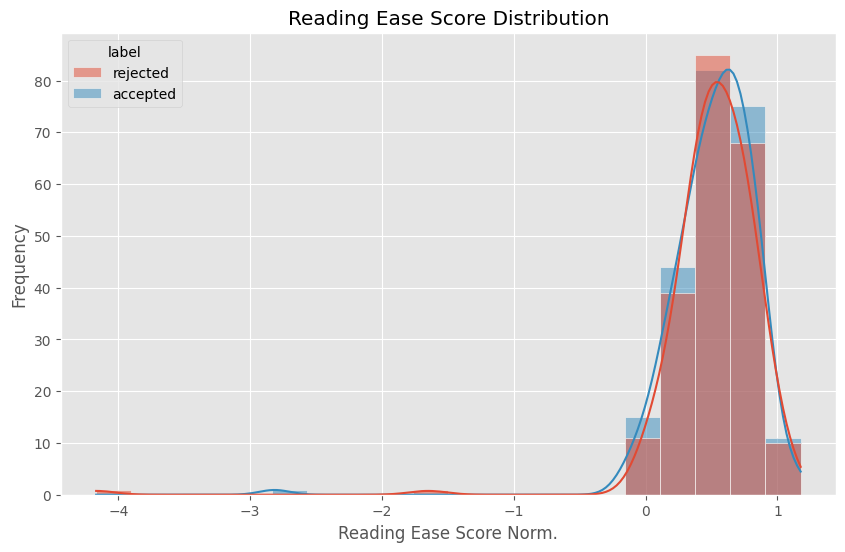

-----------------------------------------------------
Linear Discriminant Analysis
Target looks like classification
Showing only top 10 of 386 continuous features


/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/seaborn-0.12.2-py3.12.egg/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/dabl/plot/utils.py:595: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:


Linear Discriminant Analysis training set score: 1.000


/Users/kdlx593/miniconda3/envs/stream_ml/lib/python3.12/site-packages/dabl/plot/utils.py:595: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:


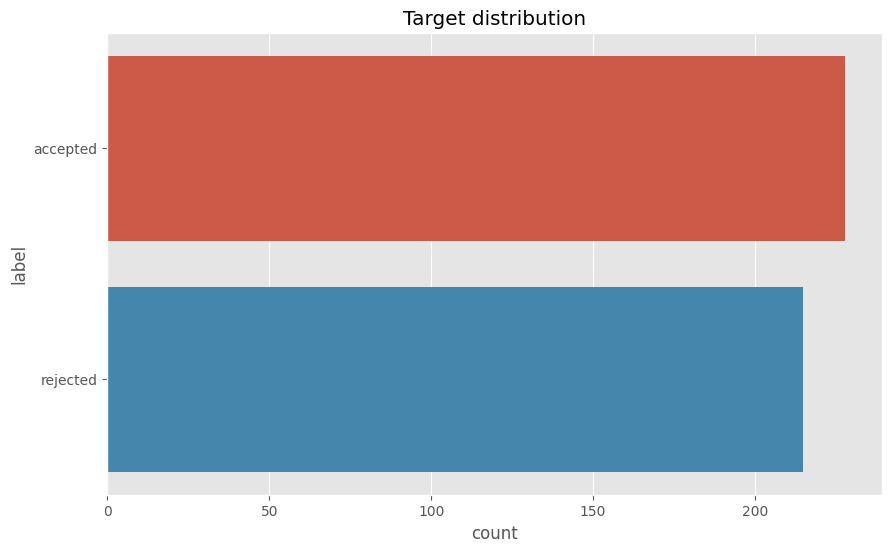

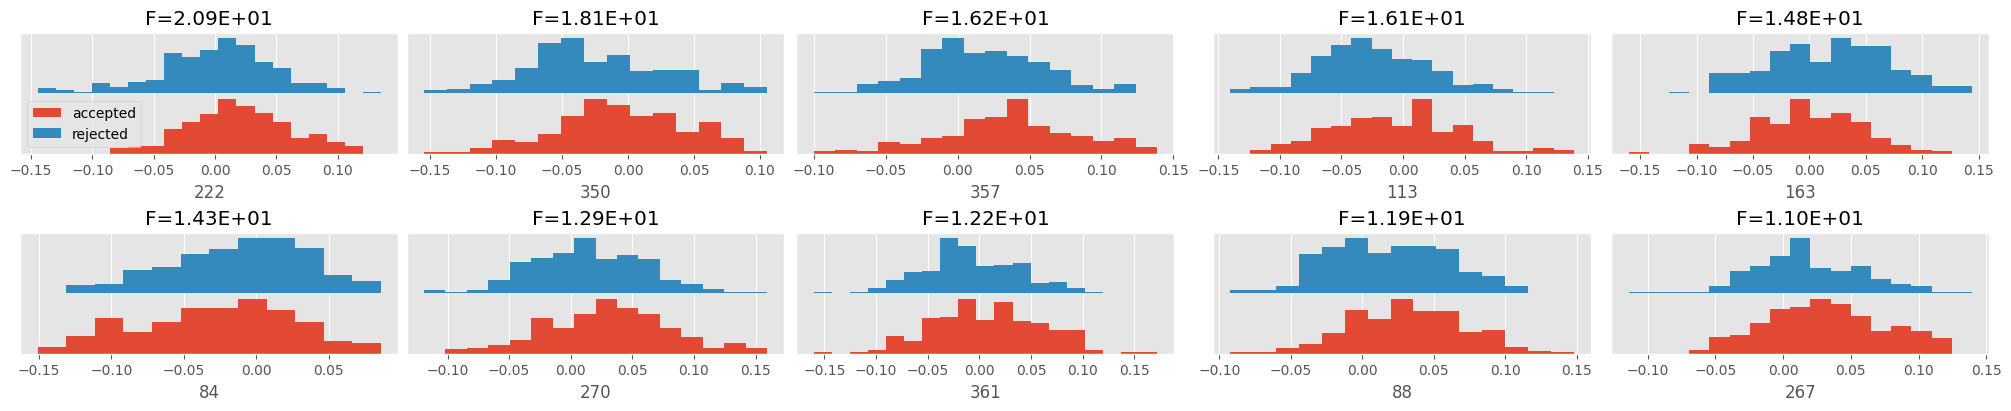

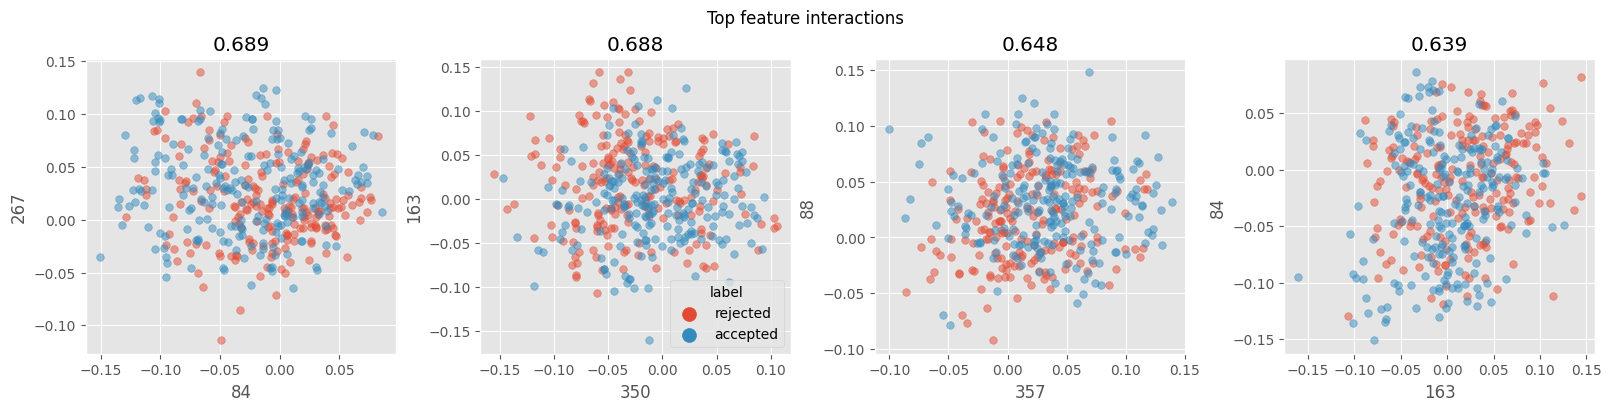

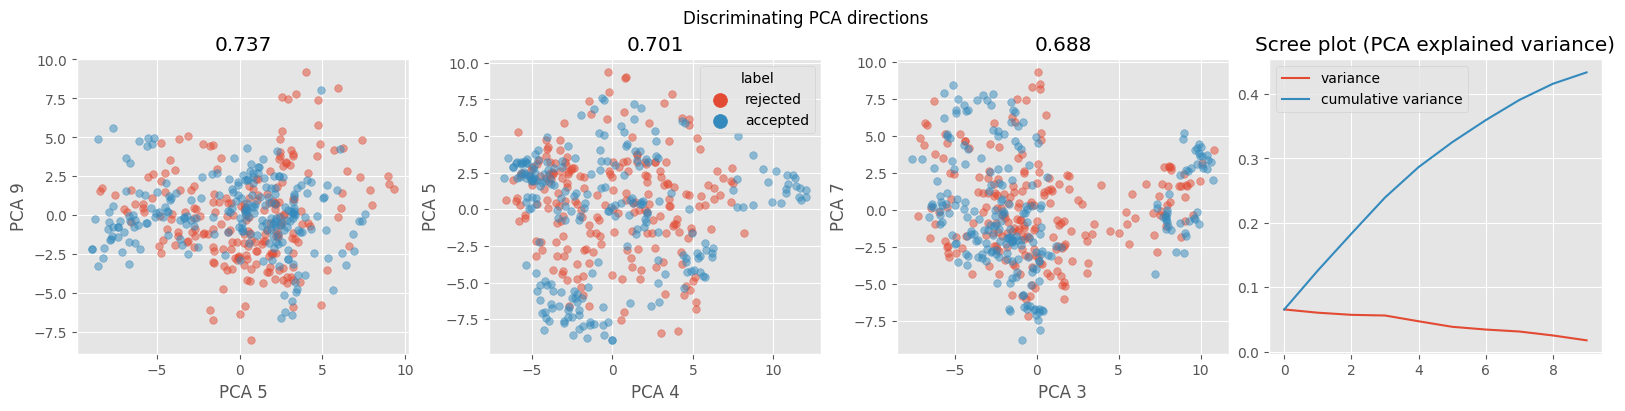

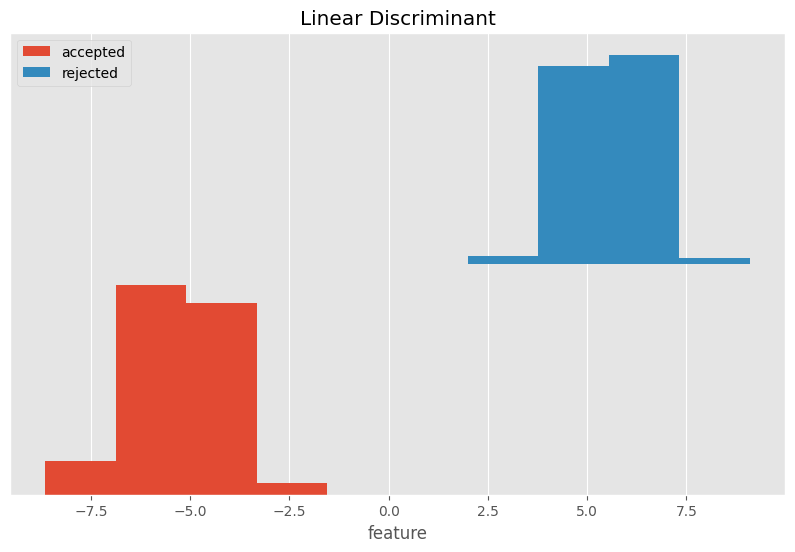

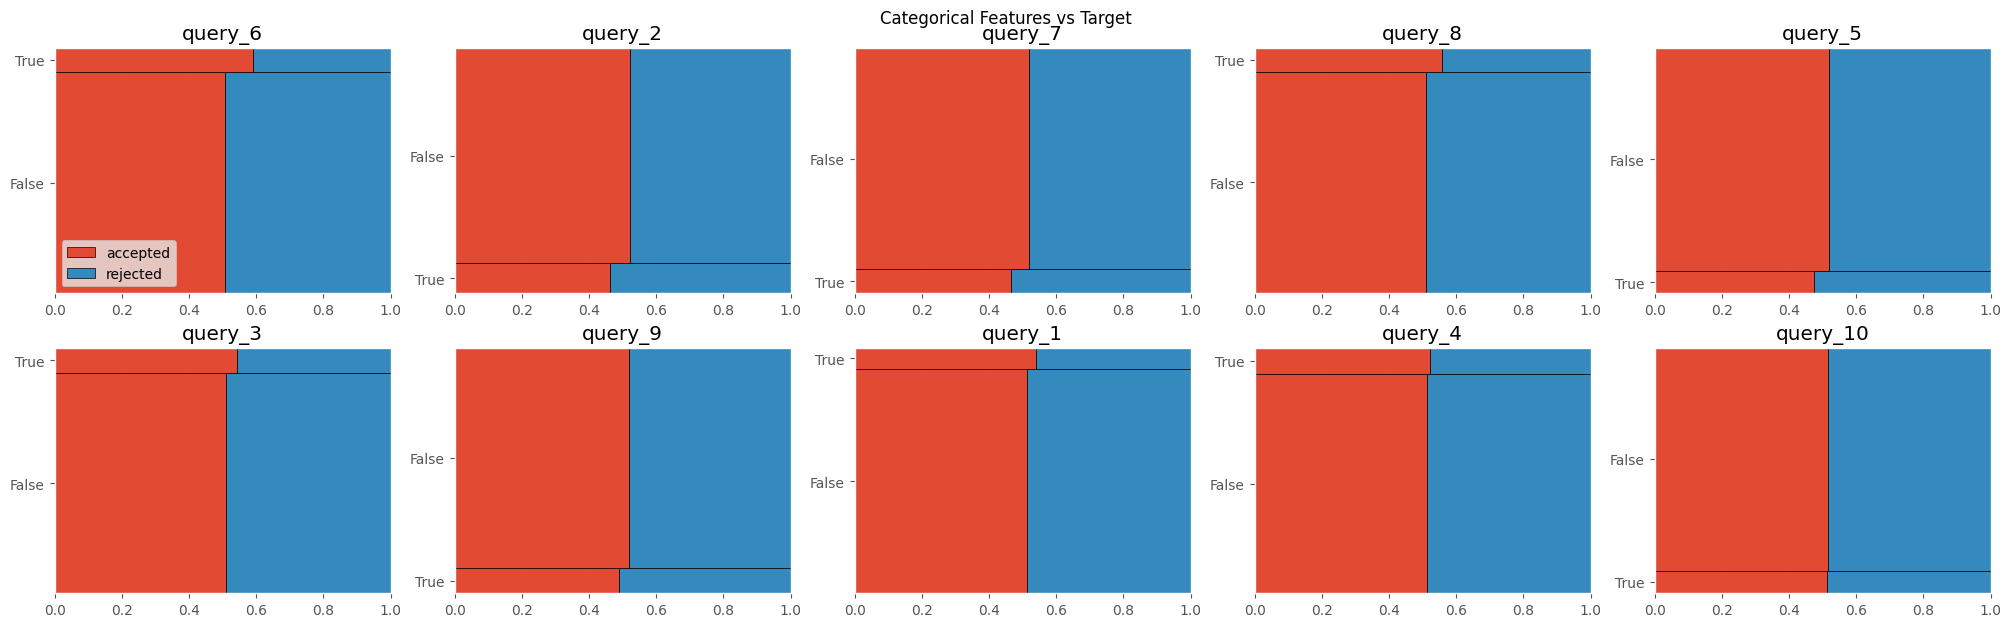

In [3]:
# Launch The text analytics Pipeline
txt_analytics = TextAnalytics(df)
txt_analytics.basic_summary()

## Section 2 - Validating Topic Classification Quality



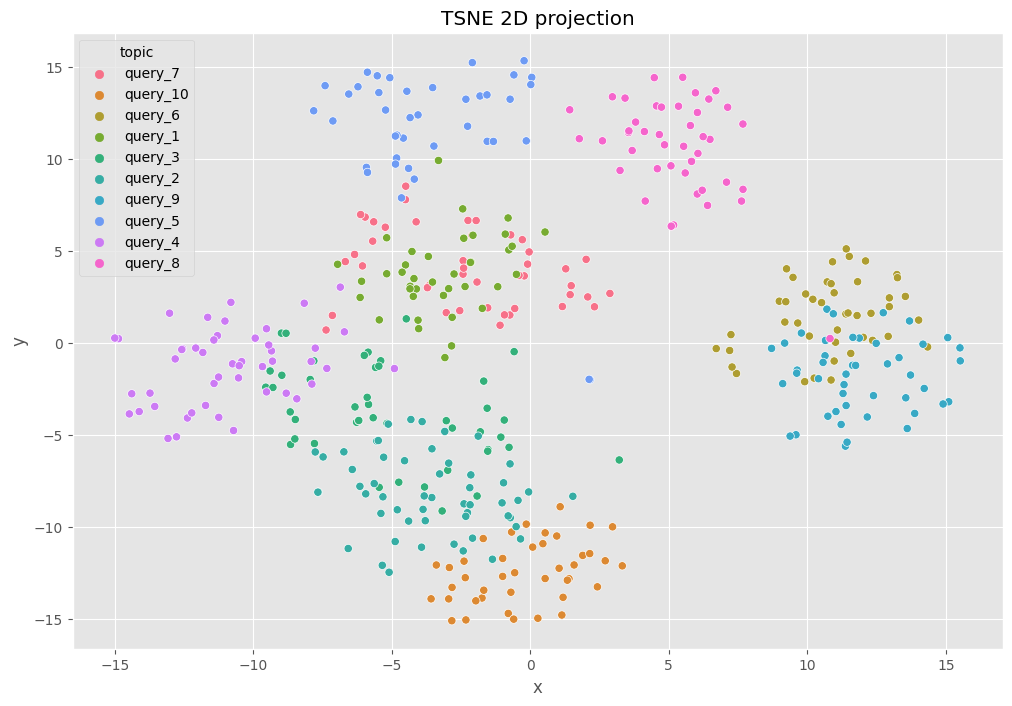

In [4]:

tsne = TSNE(n_components=3, random_state=42)
# Perform dim reduction TSNE model
embeddings_tsne = tsne.fit_transform(
    np.array(
        [emb for emb in txt_analytics.dataframe.embedding.values]
    )
)
# Add results into a DF
res = pd.DataFrame(embeddings_tsne, columns=['x', 'y', 'z'])
# Add labels and topics back into the mix.
res['label'] = txt_analytics.dataframe.label
res['topic'] = txt_analytics.dataframe.topic

# Plot 2D
fig = plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=res,
    x='x',
    y='y',
    hue='topic'
)
plt.title("TSNE 2D projection")
plt.show()





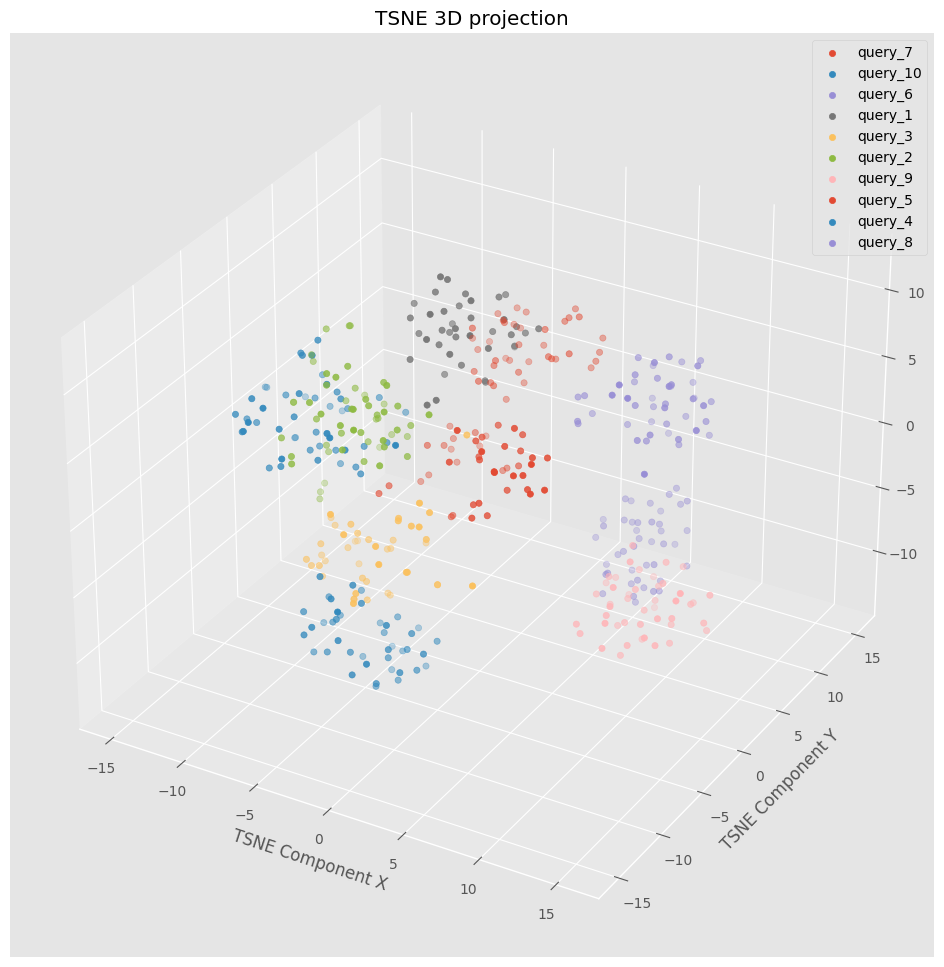

In [5]:
# Plot 3D
fig = plt.figure(
    figsize=(16, 12)
)

ax = fig.add_subplot(111, projection='3d')

for top in res.topic.unique():
    tmp = res.query("topic == @top")
    ax.scatter(
        tmp.x, tmp.y, tmp.z, 
        label=top, 
    )
    
ax.set_title( "TSNE 3D projection")

ax.set_xlabel('TSNE Component X')
ax.set_ylabel('TSNE Component Y')

ax.legend()
plt.show()

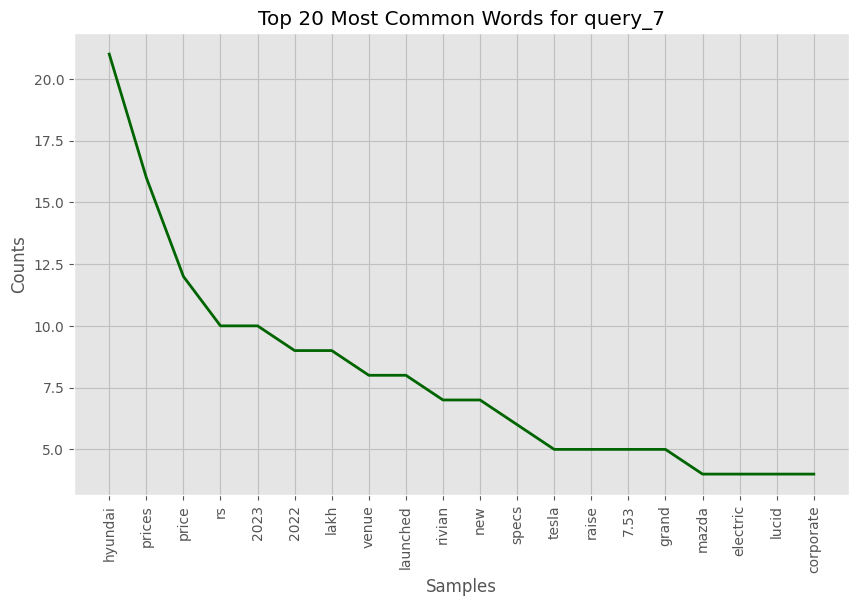

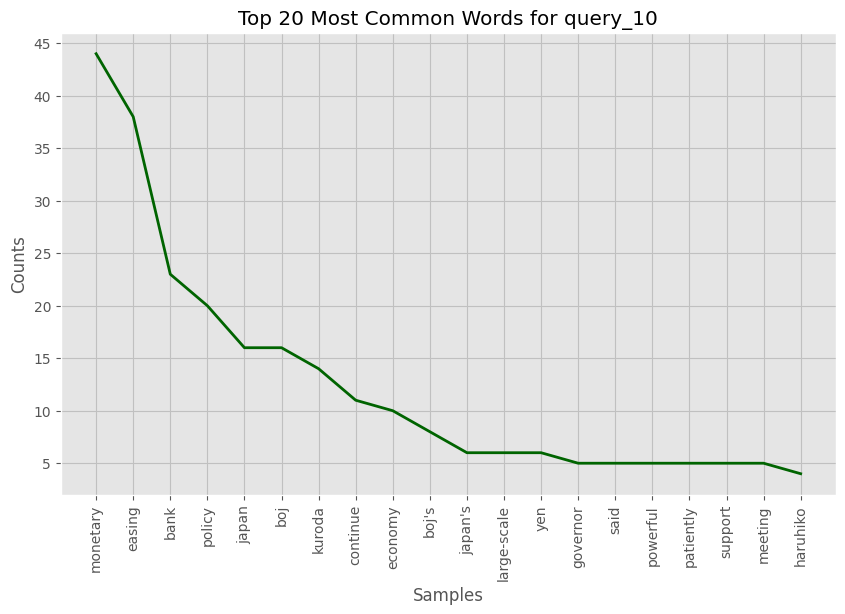

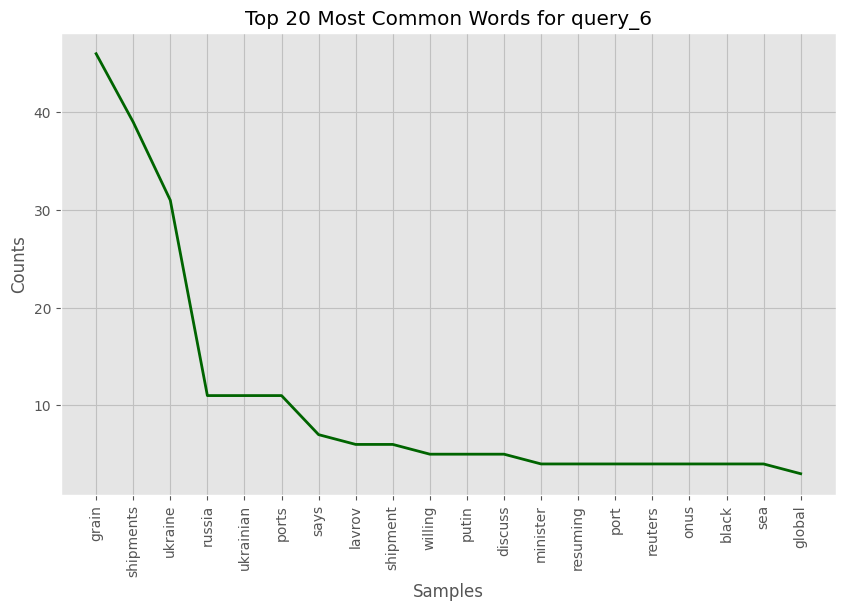

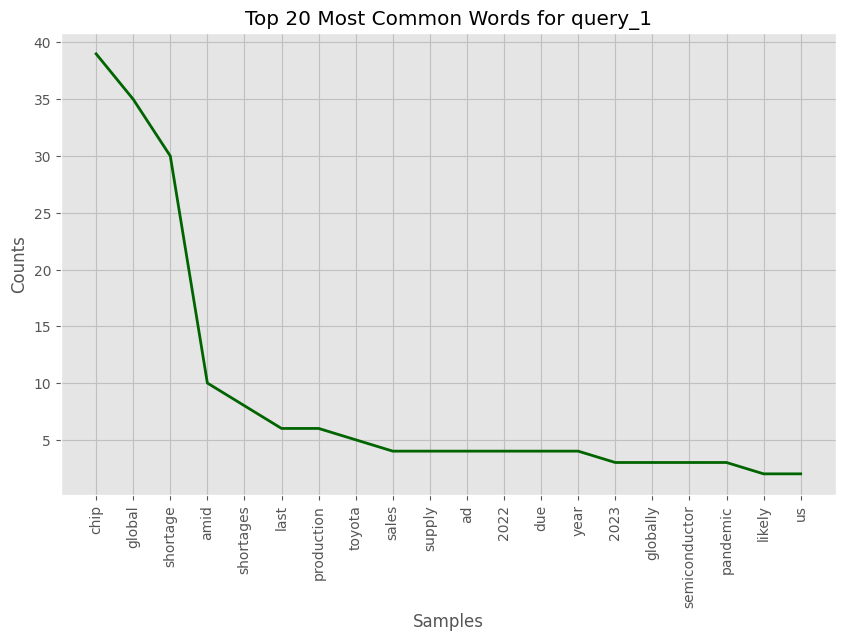

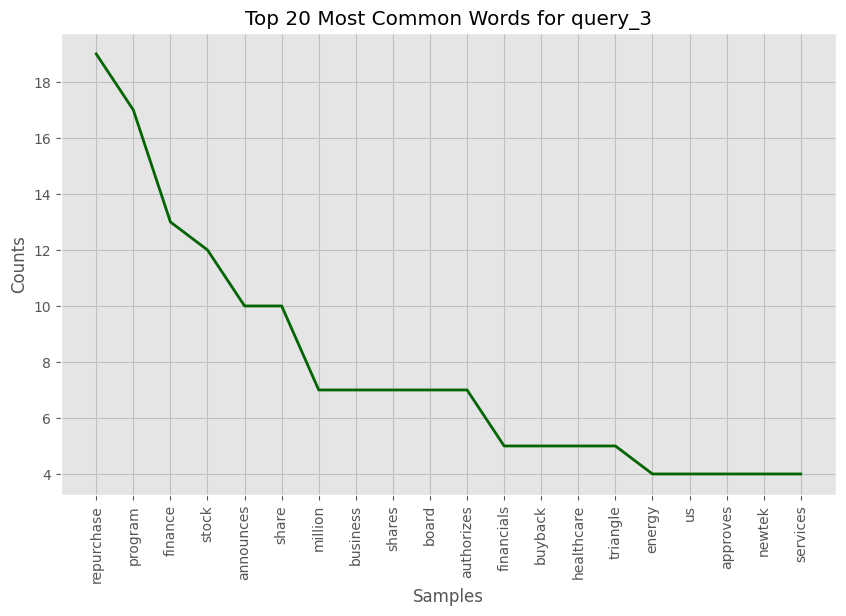

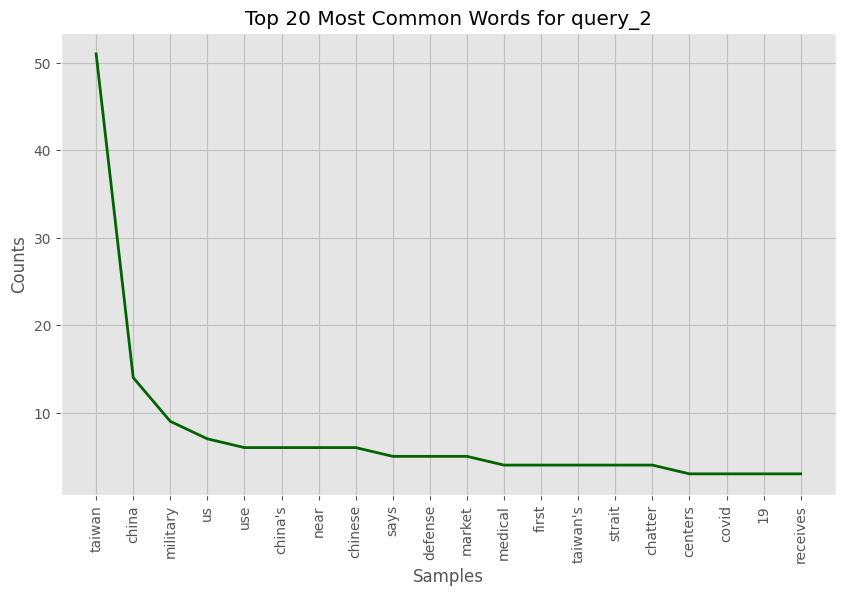

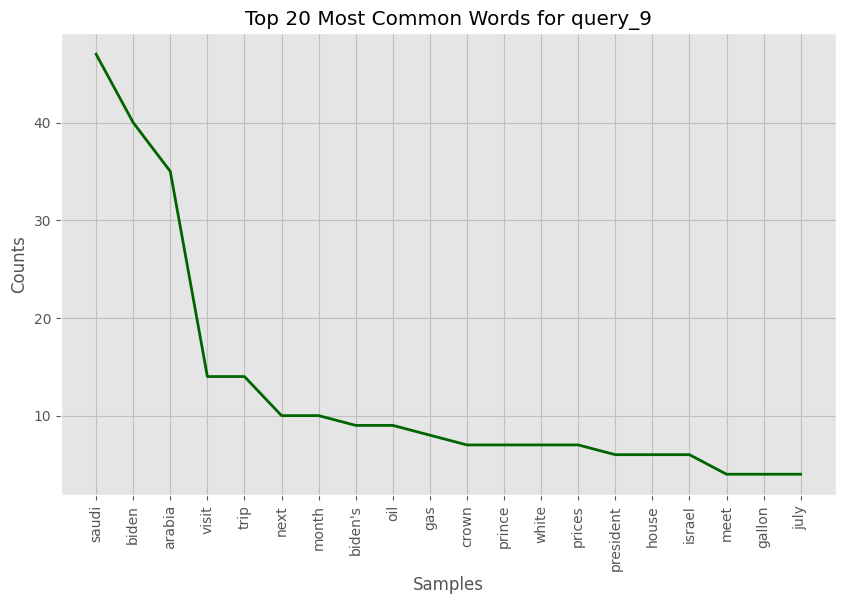

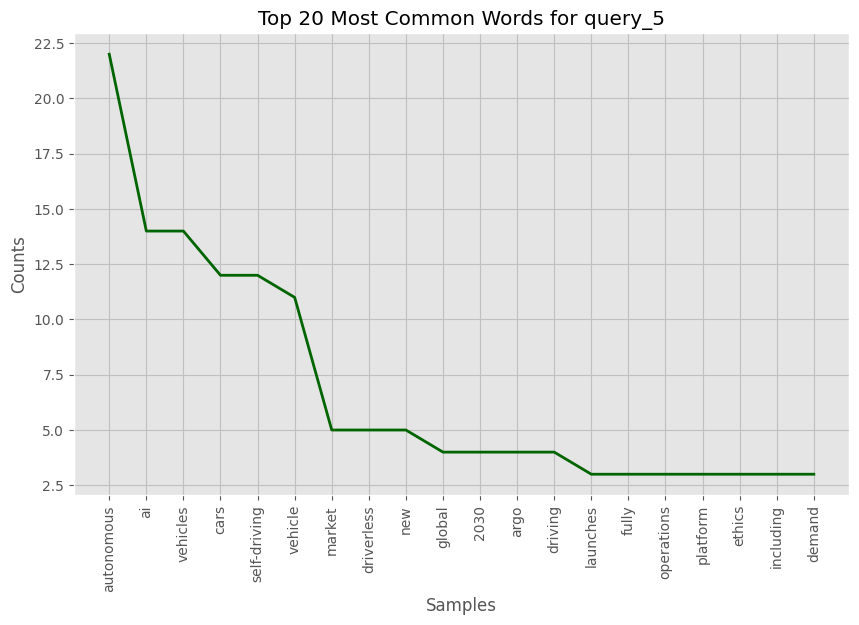

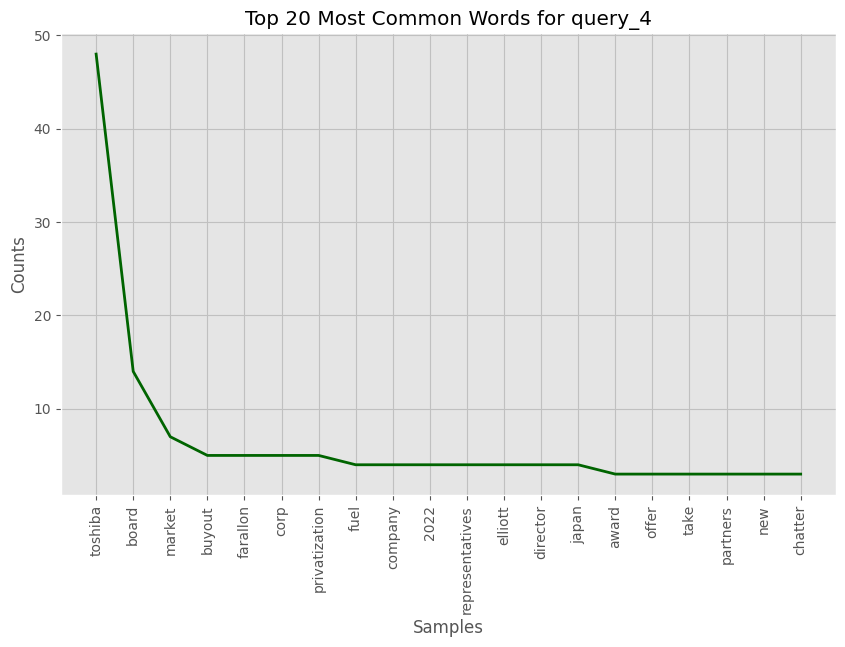

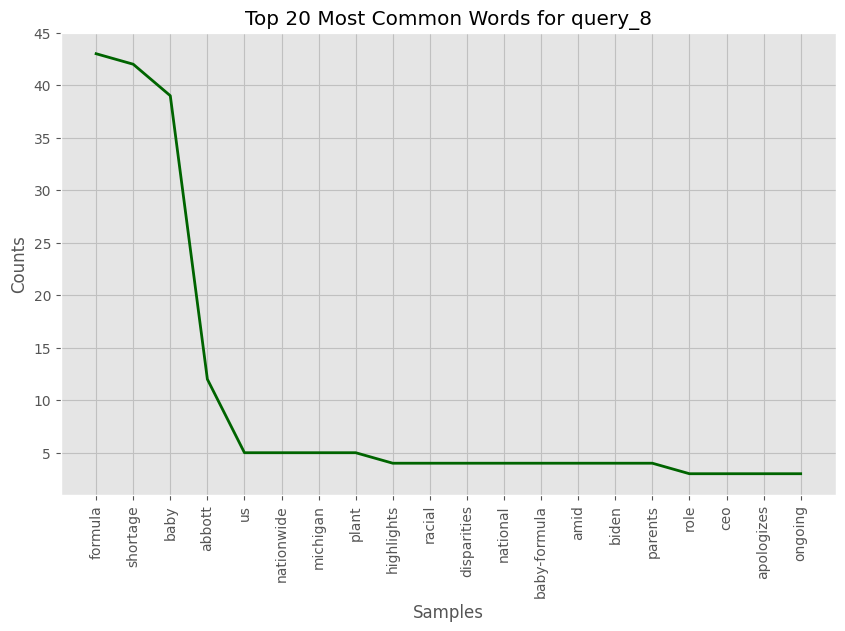

In [6]:
# Plotting top tokens
for top in txt_analytics.dataframe.topic.unique():
    tmp = txt_analytics.dataframe.query("topic == @top")['tokens']    
    top_tokens = [
        word for tokens in tmp
        for word in tokens if len(word) > 1
    ]
    # Plot
    nltk.FreqDist(top_tokens).plot(
        20, color='darkgreen',
        title=f'Top 20 Most Common Words for {top}'
    )  # most_common(20)
    plt.show()

## Quick Outlier Detection

In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
X = txt_analytics.predictive_df.drop('label', axis=1).values

In [9]:
clf = IsolationForest(random_state=42, max_features=20)
outlier_score = clf.fit_predict(X)
num_outliers = len(np.where(outlier_score != 1)[0])
f"{num_outliers} Outliers found in the data sample"


'0 Outliers found in the data sample'

No outliers detected in this sample. It is worth noting that with such a high number of dimmensions, finding outliers becomes particularly challenging. This exercise mainly validates that there are no input errors in the embeddings and the preprocessing pipelines. 

End of File